# Principal Component Analysis on Breast Cancer Scikit-Learn Dataset.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Import breast cancer dataset from Scikit Learn. PCA usually is applied on dataset that has no label, since its purpose is to analyse the features of the dataset without considering the labels of the data. That makes PCA is in a way, an unsupervised learning.**

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
cancer = load_breast_cancer()

In [6]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [17]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [13]:
cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

**Create a dataframe based on the data of the breast cancer dataset.**

In [7]:
cancer_df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [80]:
cancer_df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

**It is common to do standardizing first before applying PCA method. I'm still not really deep into this, but it has something to do with the Singular Value Decomposition, which is a term of a method that is used in order to perform PCA.**

**Nevertheless it seems fine to standardize the data first since there's quite big difference in data range between one feature and another.**

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scale = StandardScaler()

In [10]:
scaled_feat = scale.fit_transform(cancer_df)

**Import the PCA to apply the Principal Component Analysis method. It is applied in quite the same manner as applying data preprocessing using StandardScaler or MinMaxScaler.**

In [12]:
from sklearn.decomposition import PCA

**n_components value means how many columns that user wants to have instead of the number of columns that the original dataset has (in this case, there are 30 features/columns).**

In [13]:
pca = PCA(n_components=2)

In [14]:
x_pca = pca.fit_transform(scaled_feat)

**This shows that the dataset has been "shrinked" from 30-column dataset, into 2-column dataset.**

In [15]:
scaled_feat.shape

(569, 30)

In [16]:
x_pca.shape

(569, 2)

In [17]:
x_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

**Transform the PC1 and PC2 array into dataframe.**

In [18]:
xpca_df = pd.DataFrame(x_pca)

**Column 0 represents the Principal Component 1 (or PC1) and the column 1 represents PC2.**

In [19]:
xpca_df.head()

0          1
0  9.192837   1.948583
1  2.387802  -3.768172
2  5.733896  -1.075174
3  7.122953  10.275589
4  3.935302  -1.948072

**Each PC might show differenet linear combination. Hence difference in variation as well. Variation of PC can be calculated by dividing the sum of squared (distances for the PC) by number of rows (samples) minus 1.**

In [26]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

**Scree plot is used to show the variance ratio, hence can be used to show which PC is more reliable to represent the relationship of features in original dataset. From the plot below, PC1 makes the more reliable PC.**

In [29]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC'+str(i) for i in range(1, len(per_var)+1)]

Text(0.5, 1.0, 'Scree Plot')

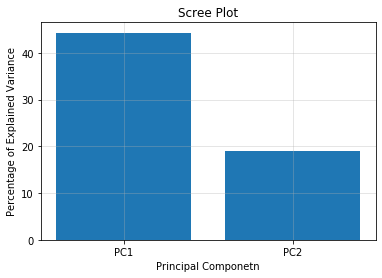

In [30]:
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Componetn')
plt.title('Scree Plot')

**It is only common for PCA to be applied on dataset which have no label information. But since the notebook is using breast cancer dataset from scikit learn which already has label information, this information can be used to show that after "shrinking" the dataset, it would be easier for any unsupervised clustering method in order to cluster the dataset using the transformed dataset (in this case the xpca_df), since it would only use 2 features (rather than using the original dataset that has 30 features).**

In [20]:
plt.rcParams['axes.grid']=True
plt.rcParams['grid.alpha']=0.4

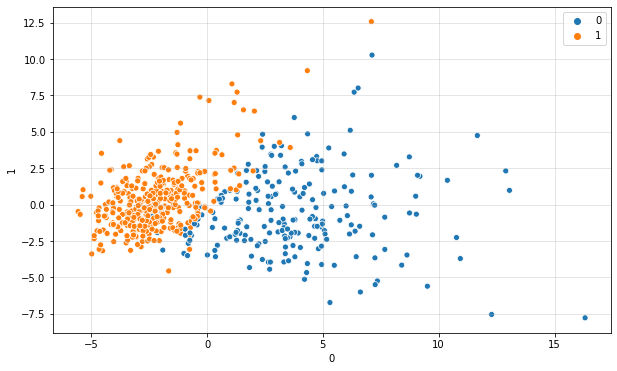

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=xpca_df[0], y=xpca_df[1], hue=cancer['target'])

**The PCA().components_ will show the loading scores of the dataset. In theory, loading scores are generated from the transformed dataset. A new line is fitted on this newly transformed dataset to show the relationship of (in this case) 2 columns of the newly transformed dataset. The relationship will represent the proportion of each feature of original dataset.**

In [22]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [23]:
df_comp = pd.DataFrame(data=pca.components_, columns=cancer['feature_names'])

**For example, Principal Component 1 (PC1) that is represented by column 0 of this dataframe below, shows that 0.218902 portion of mean radius affect the dataset, and 0.103725 portion of mean texture also affect the dataset. Hence in this case PC1 shows that mean radius is 'more important' than mean texture. So user could maybe put more attention to mean radius rather than mean texture.**

In [24]:
df_comp

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.218902      0.103725        0.227537   0.220995         0.142590   
1    -0.233857     -0.059706       -0.215181  -0.231077         0.186113   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.239285        0.258400             0.260854       0.138167   
1          0.151892        0.060165            -0.034768       0.190349   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.064363  ...      0.227997       0.104469         0.236640   
1                0.366575  ...     -0.219866      -0.045467        -0.199878   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.224871          0.127953           0.210096         0.228768   
1   -0.219352          0.172304           0.143593         0.097964   

   worst concave points  worst symmetry  worst fractal dimension  
0              0.250886        0.122905                 0.131784  
1             -0.008257        0.141883                 0.275339  

[2 rows x 30 columns]

**This heatmap below elaborates more about the explanation of loading scores' function. The heatmap shows, the brighter the color, the more the feature has affect on the dataset.**

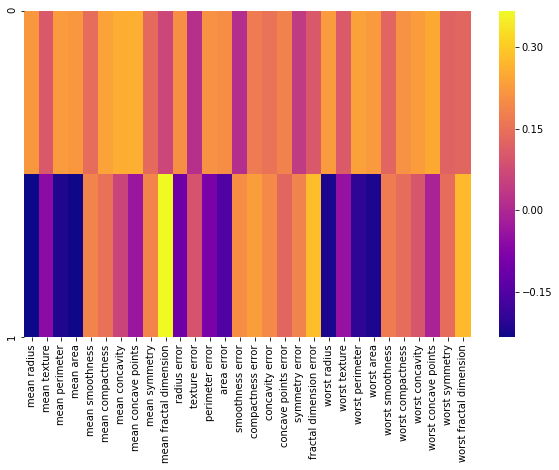

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df_comp, yticklabels=True, cmap='plasma')

### In conclusion, PCA method can be used to simplify datasets with large dimension. It is commonly used on a dataset with no label information with that PCA can be used to explore the features of the dataset.

(end of notebook).